In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import params as my
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
data = pd.read_csv('data.csv')

In [3]:
vtx = data['# vtx with two tracks of opposite curvature'].to_numpy()
x = data['XV (cm)'].to_numpy()
y = data['YV(cm)'].to_numpy()
z = data['ZV(cm)'].to_numpy()
px1 = data['Track1 PX(MeV) '].to_numpy()
py1 = data['Track1 PY(MeV) '].to_numpy()
pz1 = data['Track1 PZ(MeV) '].to_numpy()
px2 = data['Track2 PX(MeV) '].to_numpy()
py2 = data['Track2 PY(MeV) '].to_numpy()
pz2 = data['Track2 PZ(MeV) '].to_numpy()

In [38]:
N_phi = my.luminosity * my.sigma_ee_phi
N_KLKS = N_phi * my.BR_phi_KK
print(f"Number of produced KL/KS pairs = {int(N_KLKS)}")

N_KL_CP = N_KLKS * my.BR_KL_2pi
print(f"Expected CP violating KL = {int(N_KL_CP)}")

print(f"BR = {N_KL_CP/N_KLKS}")

N_KL_CP_measured = N_KL_CP * my.acceptance * my.epsL
print(f"\nDetected CP violating KL = {int(N_KL_CP_measured)}")

N_KS_measured = N_KLKS * my.BR_KS_2pi * my.epsS
print(f"Expected KS = {int(N_KS_measured)}")

print(f"\nNumber of events in data : {len(np.where(vtx == 1)[0])}")

Number of produced KL/KS pairs = 204000
Expected CP violating KL = 408
BR = 0.002

Detected CP violating KL = 51
Expected KS = 98532

Number of events in data : 200743


In [23]:
# Define some useful quantities
radius = np.sqrt(x*x + y*y + z*z)

mass_array = np.repeat(my.m_pi, len(data))
E1 = my.getE(mass_array, px1, py1, pz1)
E2 = my.getE(mass_array, px2, py2, pz2)
inv_mass = my.invmass(E1+E2, px1+px2, py1+py2, pz1+pz2)

p_array = np.repeat(my.p_K0, len(data))
p_tot = my.norm(px1+px2, py1+py2, pz1+pz2)

mass_K_array = np.repeat(my.m_K0, len(data))
pKx, pKy, pKz = my.getComponents(p_array, x, y, z)
E_K = my.getE(mass_K_array, pKx, pKy, pKz)

delta_px = pKx - px1 - px2
delta_py = pKy - py1 - py2
delta_pz = pKz - pz1 - pz2

missing_p = my.norm(pKx-px1-px2, pKy-py1-py2, pKz-pz1-pz2)
M2 = (E_K - E1 -E2)**2 - missing_p**2

angle_K_pi = my.angle_of_vectors(pKx, pKy, pKz, px1+px2, py1+py2, pz1+pz2)

In [33]:
# Define cuts

cut_r = radius >= 10
cut_r_inv = np.invert(cut_r)
cut_FV = (z > -my.zlim) & (z < my.zlim) & (np.sqrt(x*x+y*y) > my.xmin) & (np.sqrt(x*x+y*y) < my.xmax)
cut_m = (inv_mass > my.m_K0 - 7) & (inv_mass < my.m_K0 + 7)
cut_p = (p_tot > my.p_K0 - 20) & (p_tot < my.p_K0 + 20)
cut_M2 = (M2 > -100) & (M2 < 100)

cut_pxpypz = (delta_px > -15) & (delta_px < 15) & (delta_py > -15) & (delta_py < 15) & (delta_pz > -15) & (delta_pz < 15)

cut_angle = (0.998 < np.cos(np.radians(angle_K_pi))) & (np.cos(np.radians(angle_K_pi)) <= 1)

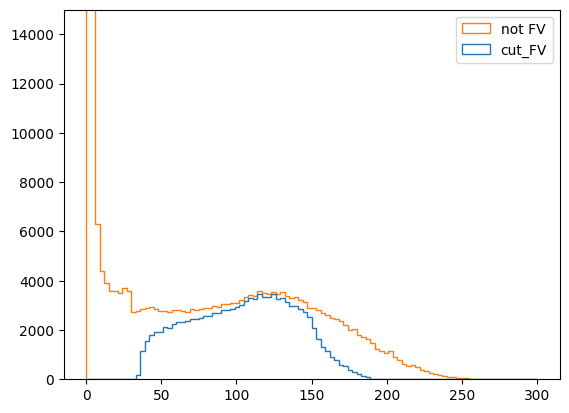

In [34]:
nbins = 100
lims = (0, 300)

#plt.hist(radius, histtype = 'step', bins = nbins, range = lims, label = 'data')
# plt.hist(radius[cut_FV], histtype = 'step', bins = nbins, range = lims, label = 'cut_FV')

plt.hist([radius[cut_FV], radius[cut_FV == False]], 
         bins = nbins, range = lims, histtype = 'step',
         label = ['cut_FV','not FV'], stacked = True)

plt.ylim(0, 15000)
plt.legend();

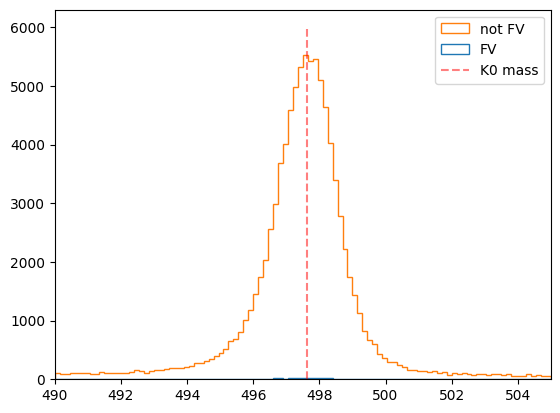

In [37]:
lims = (490, 505)

nbins = 100

plt.hist([inv_mass[cut_angle], inv_mass[(cut_angle) == False]], 
         histtype = 'step', bins = nbins, range = lims, 
         label = ['FV', 'not FV'], stacked = True)

# plt.hist([inv_mass[cut_r], inv_mass[(cut_r) == False]], 
#          histtype = 'step', bins = nbins, range = lims, 
#          label = ['KL', 'KS'], stacked = True)

plt.vlines(my.m_K0, 0, 6000, 'r', linestyle = 'dashed', label = 'K0 mass', alpha = 0.5)
plt.xlim(lims)
# plt.ylim(0,100)
plt.legend();

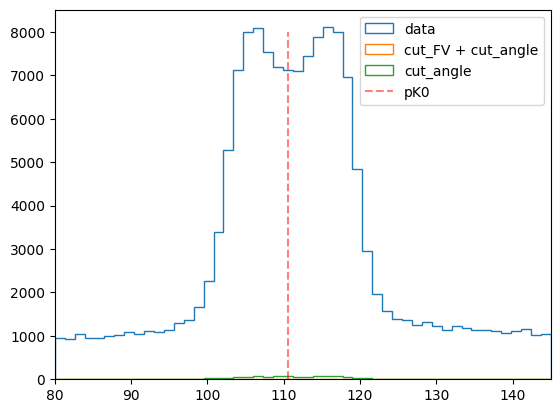

In [135]:
bins = 50
lims = (80,145)

plt.hist(p_tot, histtype = 'step', bins = bins, range = lims, label = 'data')
plt.hist(p_tot[cut_FV & cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_FV + cut_angle')
plt.hist(p_tot[cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_angle')
plt.vlines(my.p_K0, 0, 8000, 'r', linestyle = 'dashed', label = 'pK0', alpha = 0.5)
plt.xlim(lims)
plt.legend();

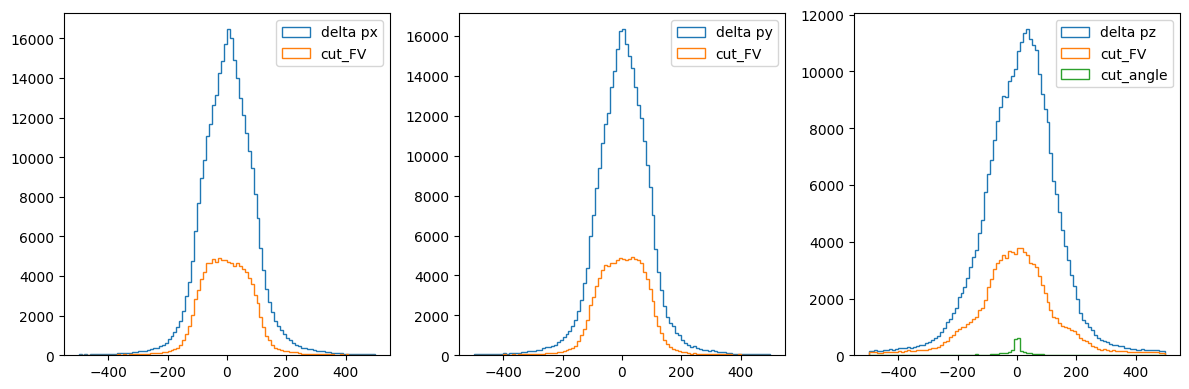

In [136]:
plt.figure(figsize = (12,4))

bins = 100
lims = (-500,500)

plt.subplot(131)


plt.hist(delta_px, histtype = 'step', bins = bins, range = lims,label = 'delta px')
plt.hist(delta_px[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(132)


plt.hist(delta_py, histtype = 'step', bins = bins, range = lims,label = 'delta py')
plt.hist(delta_py[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(133)

plt.hist(delta_pz, histtype = 'step', bins = bins, range = lims, label = 'delta pz')
plt.hist(delta_pz[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
plt.hist(delta_pz[cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_angle')

plt.legend()

plt.tight_layout();

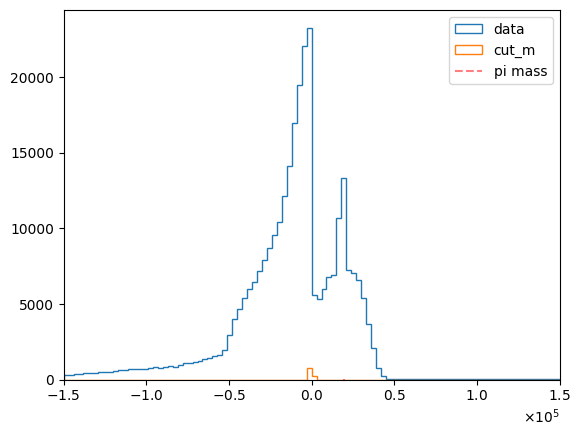

In [252]:
lims = (-150000,150000)
bins = 100
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3), useMathText = True)

plt.hist(M2, histtype = 'step', bins = bins, range = lims, label = 'data');
# plt.hist(M2[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
# plt.hist(M2[cut_angle], histtype = 'step', bins = bins, range = lims, label = 'cut_angle')
plt.hist(M2[cut_M2], histtype = 'step', bins = bins, range = lims, label = 'cut_m')

plt.vlines(my.m_pi**2, 0, 50, 'r', linestyle = 'dashed', label = 'pi mass', alpha = 0.5)
plt.legend()
plt.xlim(lims);

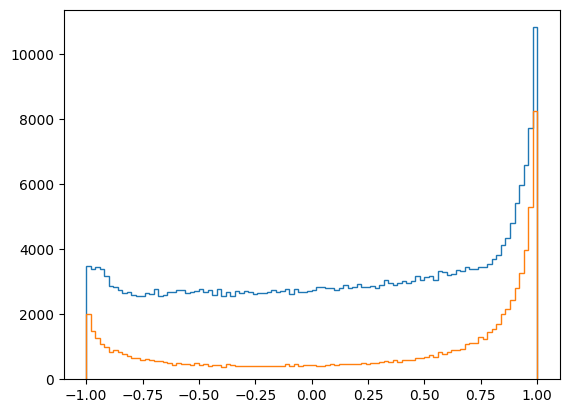

In [142]:
theta = my.getTheta(x,y,z)

bins = 100

n, bins, _ = plt.hist(np.cos(theta), histtype = 'step', bins = bins);
# plt.hist(np.cos(theta[cut_FV]), histtype = 'step', bins = bins);
# plt.hist(np.cos(theta[cut_r_inv]), histtype = 'step', bins = bins);
plt.hist(np.cos(theta[cut_m]), histtype = 'step', bins = bins);

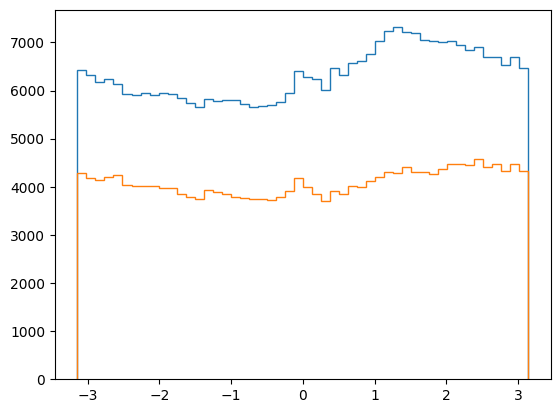

In [143]:
phi = my.getPhi(x,y,z)

bins = 50

plt.hist(phi, histtype = 'step', bins = bins);
plt.hist(phi[cut_r], histtype = 'step', bins = bins);

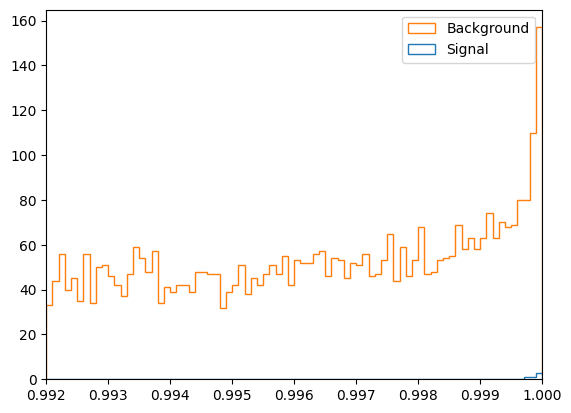

In [219]:
bins = 80
lims = (0.992,1)

# plt.hist(np.cos(np.radians(angle_K_pi)), histtype = 'step', bins = bins, range = lims);
plt.hist([np.cos(np.radians(angle_K_pi[cut_FV & cut_M2])), np.cos(np.radians(angle_K_pi[(cut_FV & cut_M2) == False]))], 
         histtype = 'step', bins = bins, range = lims,
         label = ['Signal', 'Background'], stacked = True);

plt.xlim(0.992, 1)
plt.legend();

# Event Display

In [284]:
sliced = data.iloc[15:18]
sliced

,#,# vtx with two tracks of opposite curvature,XV (cm),YV(cm),ZV(cm),Track1 PX(MeV),Track1 PY(MeV),Track1 PZ(MeV),Track2 PX(MeV),Track2 PY(MeV),Track2 PZ(MeV)
15,15,1,-12.901211,20.282257,32.621037,-69.127640,-23.869619,-19.511436,76.433334,26.396090,25.751688
16,16,2,-11.951688,107.924591,72.273247,-68.341660,26.623821,22.928028,75.350578,-0.117513,-38.874512
17,17,3,-9.751437,94.716454,-21.873085,59.287865,-23.327478,-17.295826,-55.110222,27.467651,27.847347


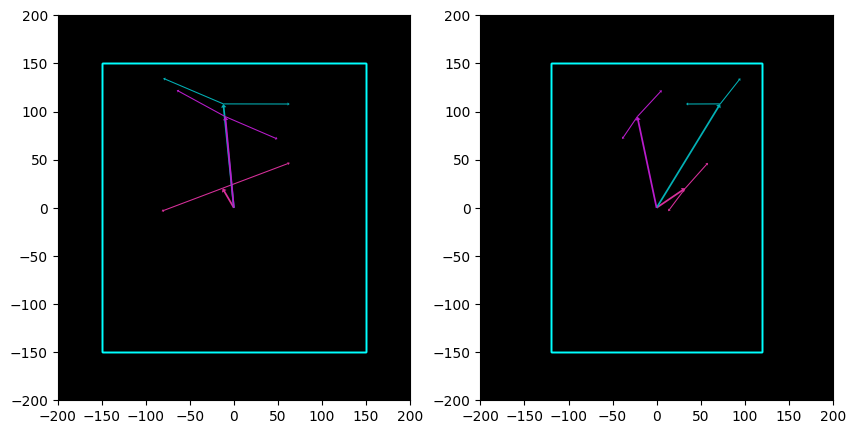

In [285]:
N = sliced['#'].values

from matplotlib.patches import Rectangle

event = N
fig, ax = plt.subplots(1, 2,figsize=(10, 5))


for i in event:

    col = (np.random.random(), np.random.random(), np.random.random())
    
    V = [x[i],y[i]]
    origin = [0,0] # origin point

    ax[0].quiver(*origin, V[0], V[1], color = col , angles='xy', scale_units='xy',
               scale=1, headlength = 2, headaxislength = 2, width = 0.005, ls = '--')
    
    track1 = [px1[i],py1[i]]
    ax[0].quiver(*V, track1[0], track1[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    
    track2 = [px2[i],py2[i]]
    ax[0].quiver(*V, track2[0], track2[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)

    ax[0].add_patch(Rectangle((-150, -150), 300, 300,
             edgecolor = 'cyan',
             facecolor = 'blue',
             fill=False,
             lw=1))
    
    V = [z[i],y[i]]
    origin = [0,0] # origin point

    ax[1].quiver(*origin, V[0], V[1], color = col , angles='xy', scale_units='xy',
               scale=1, headlength = 2, headaxislength = 2, width = 0.005, ls = '--')
    
    track1 = [pz1[i],py1[i]]
    ax[1].quiver(*V, track1[0], track1[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    track2 = [pz2[i],py2[i]]
    ax[1].quiver(*V, track2[0], track2[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    
    ax[1].add_patch(Rectangle((-120, -150), 240, 300,
         edgecolor = 'cyan',
         facecolor = 'blue',
         fill=False,
         lw=1))
    

ax[0].set_xlim([-200, 200])
ax[0].set_ylim([-200, 200])
ax[1].set_xlim([-200, 200])
ax[1].set_ylim([-200, 200])
ax[0].set_facecolor('black')
ax[1].set_facecolor('black')

# Data Processing

In [315]:
vtx1 = vtx                                                                         # Auxiliary variable to eventually slice data

events = np.where(vtx1 == 1)[0]
ext_events = np.append(events,len(vtx1))                                            # extend array to avoid problems in for loop


tol = np.pi/10


cuts_CP_KL = cut_m & cut_angle                                              # Define cuts to discriminate CP violating K-Long
cuts_KS = cut_m & cut_p


KL = 0
KL_CP = 0




for i, eve in enumerate(events):                                                   # Loop through events
    
    event_length = ext_events[i+1]-ext_events[i]
    print(f'-> Event {i} Index {eve} Length {event_length}')
    
    if event_length == 1:
        if cut_FV[eve] == True:                                                    #  a KL has been detected
            KL += 1
            print('\tFound KL')
            if cuts_CP_KL[eve]:                                                    # a CP violating KL has been detected
                KL_CP += 1
                print('\tFound CP violating KL')
        else :                                                                     # KS found so a KL must be somewhere
            if cuts_KS[eve]:                                          
                KL += 1
                print('\tKL from KS Tag')
    
    
    elif event_length > 1:                                                         # Case with more than 1 vertex
        
        BTB = 0
        
        for j in range(0, event_length):
            for k in range(j+1, event_length):
                
                if (-tol + np.pi < (theta[j+eve] + theta[k+eve]) < tol + np.pi):
                    if (np.pi-tol < abs(phi[k+eve] - phi[j+eve]) < np.pi+tol):
                        if (radius[k+eve] <= radius[j+eve]):
                            # KL was found and tagged
                            KL += 1
                            BTB += 1
                            print(f'\t{k+eve} is a KS, {j+eve} is a KL')
                            if cut_FV[j+eve] & cuts_CP_KL[j+eve]:
                                # CP violating KL
                                KL_CP += 1
                                print(f'\t{j+eve} is a CP violating KL')
                        elif (radius[k+eve] > radius[j+eve]):
                            KL += 1
                            BTB += 1
                            print(f'\t{j+eve} is a KS, {k+eve} is a KL')
                            if cut_FV[k+eve] & cuts_CP_KL[k+eve]:
                                # CP violating KL
                                KL_CP += 1
                                print(f'\t{k+eve} is a CP violating KL')
                else:
                    print(f'\tNo Kaon to Tag {j+eve}, {k+eve}')
        
        
        if BTB == 0:
            for j in range(0, event_length):
                if radius[j+eve] <= 50:                                             #  a KS has been detected then a Kl is present
                    if cuts_KS[j+eve]:                                          
                        KL += 1
                        print(f'\tKL from KS Tag {j+eve}')
                        break
                    
                else :                                                              # detected KL 
                    if cut_FV[j+eve]:
                        KL += 1
                        print(f'\tFound KL {j+eve}')
                        if cuts_CP_KL[j+eve]:                                       # a CP violating KL has been detected
                            KL_CP += 1
                            print(f'\tFound CP violating KL {j+eve}')
                        break

-> Event 0 Index 0 Length 1
	KL from KS Tag
-> Event 1 Index 1 Length 1
	KL from KS Tag
-> Event 2 Index 2 Length 1
-> Event 3 Index 3 Length 1
	KL from KS Tag
-> Event 4 Index 4 Length 1
-> Event 5 Index 5 Length 1
-> Event 6 Index 6 Length 4
	No Kaon to Tag 6, 8
	6 is a KS, 9 is a KL
	No Kaon to Tag 7, 9
	No Kaon to Tag 8, 9
-> Event 7 Index 10 Length 1
	KL from KS Tag
-> Event 8 Index 11 Length 1
	KL from KS Tag
-> Event 9 Index 12 Length 2
	12 is a KS, 13 is a KL
-> Event 10 Index 14 Length 1
	KL from KS Tag
-> Event 11 Index 15 Length 3
	No Kaon to Tag 15, 16
	No Kaon to Tag 15, 17
	No Kaon to Tag 16, 17
	Found KL 16
-> Event 12 Index 18 Length 1
	Found KL
-> Event 13 Index 19 Length 2
	No Kaon to Tag 19, 20
	KL from KS Tag 19
-> Event 14 Index 21 Length 1
-> Event 15 Index 22 Length 2
	No Kaon to Tag 22, 23
	Found KL 22
-> Event 16 Index 24 Length 1
-> Event 17 Index 25 Length 1
-> Event 18 Index 26 Length 1
	KL from KS Tag
-> Event 19 Index 27 Length 1
-> Event 20 Index 28 Lengt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



	KL from KS Tag
-> Event 197209 Index 311605 Length 2
	Found KL 311605
-> Event 197210 Index 311607 Length 4
	No Kaon to Tag 311607, 311608
	No Kaon to Tag 311607, 311609
	No Kaon to Tag 311607, 311610
	Found KL 311608
-> Event 197211 Index 311611 Length 2
	No Kaon to Tag 311611, 311612
	Found KL 311611
-> Event 197212 Index 311613 Length 1
-> Event 197213 Index 311614 Length 1
-> Event 197214 Index 311615 Length 1
-> Event 197215 Index 311616 Length 1
-> Event 197216 Index 311617 Length 3
	No Kaon to Tag 311617, 311618
	No Kaon to Tag 311617, 311619
	No Kaon to Tag 311618, 311619
	Found KL 311617
-> Event 197217 Index 311620 Length 1
	Found KL
-> Event 197218 Index 311621 Length 1
	KL from KS Tag
-> Event 197219 Index 311622 Length 1
-> Event 197220 Index 311623 Length 2
	No Kaon to Tag 311623, 311624
	Found KL 311623
-> Event 197221 Index 311625 Length 1
	KL from KS Tag
-> Event 197222 Index 311626 Length 1
-> Event 197223 Index 311627 Length 1
-> Event 197224 Index 311628 Length 3
	

In [326]:
kl = KL
kl

147406

In [327]:
kl_cp = KL_CP
kl_cp

18

In [328]:
print(f'ratio = {kl_cp/kl}')
print(f'expected_ratio = {N_KL_measured/N_KLKS}')

ratio = 0.0001221117186546002
expected_ratio = 0.00017499999999999997
